In [227]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import torch
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, 
roc_curve, precision_recall_curve,roc_auc_score,accuracy_score)
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler,SMOTE
rf = RandomForestClassifier()
from sklearn.linear_model import Perceptron

data = pd.read_csv('dummy_data.csv',index_col = 0)
data.head()





,convert_30,revenue_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,...,cost_purchases_year_25to100,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
1,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
2,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,0,0
3,0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,0,0,1,1,0,0,0,0,0
5,0,0.0,0.022367,0.037827,0.078231,0.336425,0.337044,1.323954,10.836336,17.994792,...,0,1,0,0,1,0,0,0,0,0


In [228]:
target_fields = ['convert_30', 'revenue_30']
features, targets_1, targets_2 = torch.from_numpy(data.drop(target_fields, axis=1).values).float(), data['convert_30'].values,data['revenue_30'].values

sm = SMOTE(random_state=224)
f,t = sm.fit_sample(features, targets_1)
rf.fit(f,t)
rf.feature_importances_

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1.27672076e-02, 1.88240639e-03, 2.41985541e-03, 1.18967899e-02,
       1.72997087e-03, 6.84630900e-03, 6.25107375e-03, 1.24317809e-02,
       7.92447918e-04, 1.94327800e-03, 2.02683183e-03, 5.37376333e-03,
       1.45974791e-03, 5.23923603e-03, 2.70897260e-03, 3.34919991e-03,
       2.25434006e-02, 2.51819220e-03, 4.64318779e-03, 6.12847084e-03,
       5.45200870e-03, 4.26907125e-03, 1.24212870e-03, 5.64601354e-03,
       1.35652736e-02, 4.82171441e-03, 2.15134912e-03, 1.38834021e-02,
       2.34451334e-03, 1.88309312e-03, 1.50602136e-03, 1.64704297e-03,
       1.16523679e-03, 1.12428061e-03, 8.36692744e-04, 1.40947483e-03,
       1.45119607e-03, 1.55413360e-03, 9.36858347e-04, 9.61109064e-04,
       8.83849133e-04, 1.27907533e-03, 7.15202729e-04, 8.85155747e-03,
       9.47746829e-03, 1.28258098e-02, 1.21503449e-02, 5.77693593e-03,
       4.33435570e-03, 5.42616498e-03, 3.49703391e-03, 1.99160320e-02,
       5.13435568e-03, 1.46237332e-02, 3.19753369e-03, 3.93328189e-03,
      

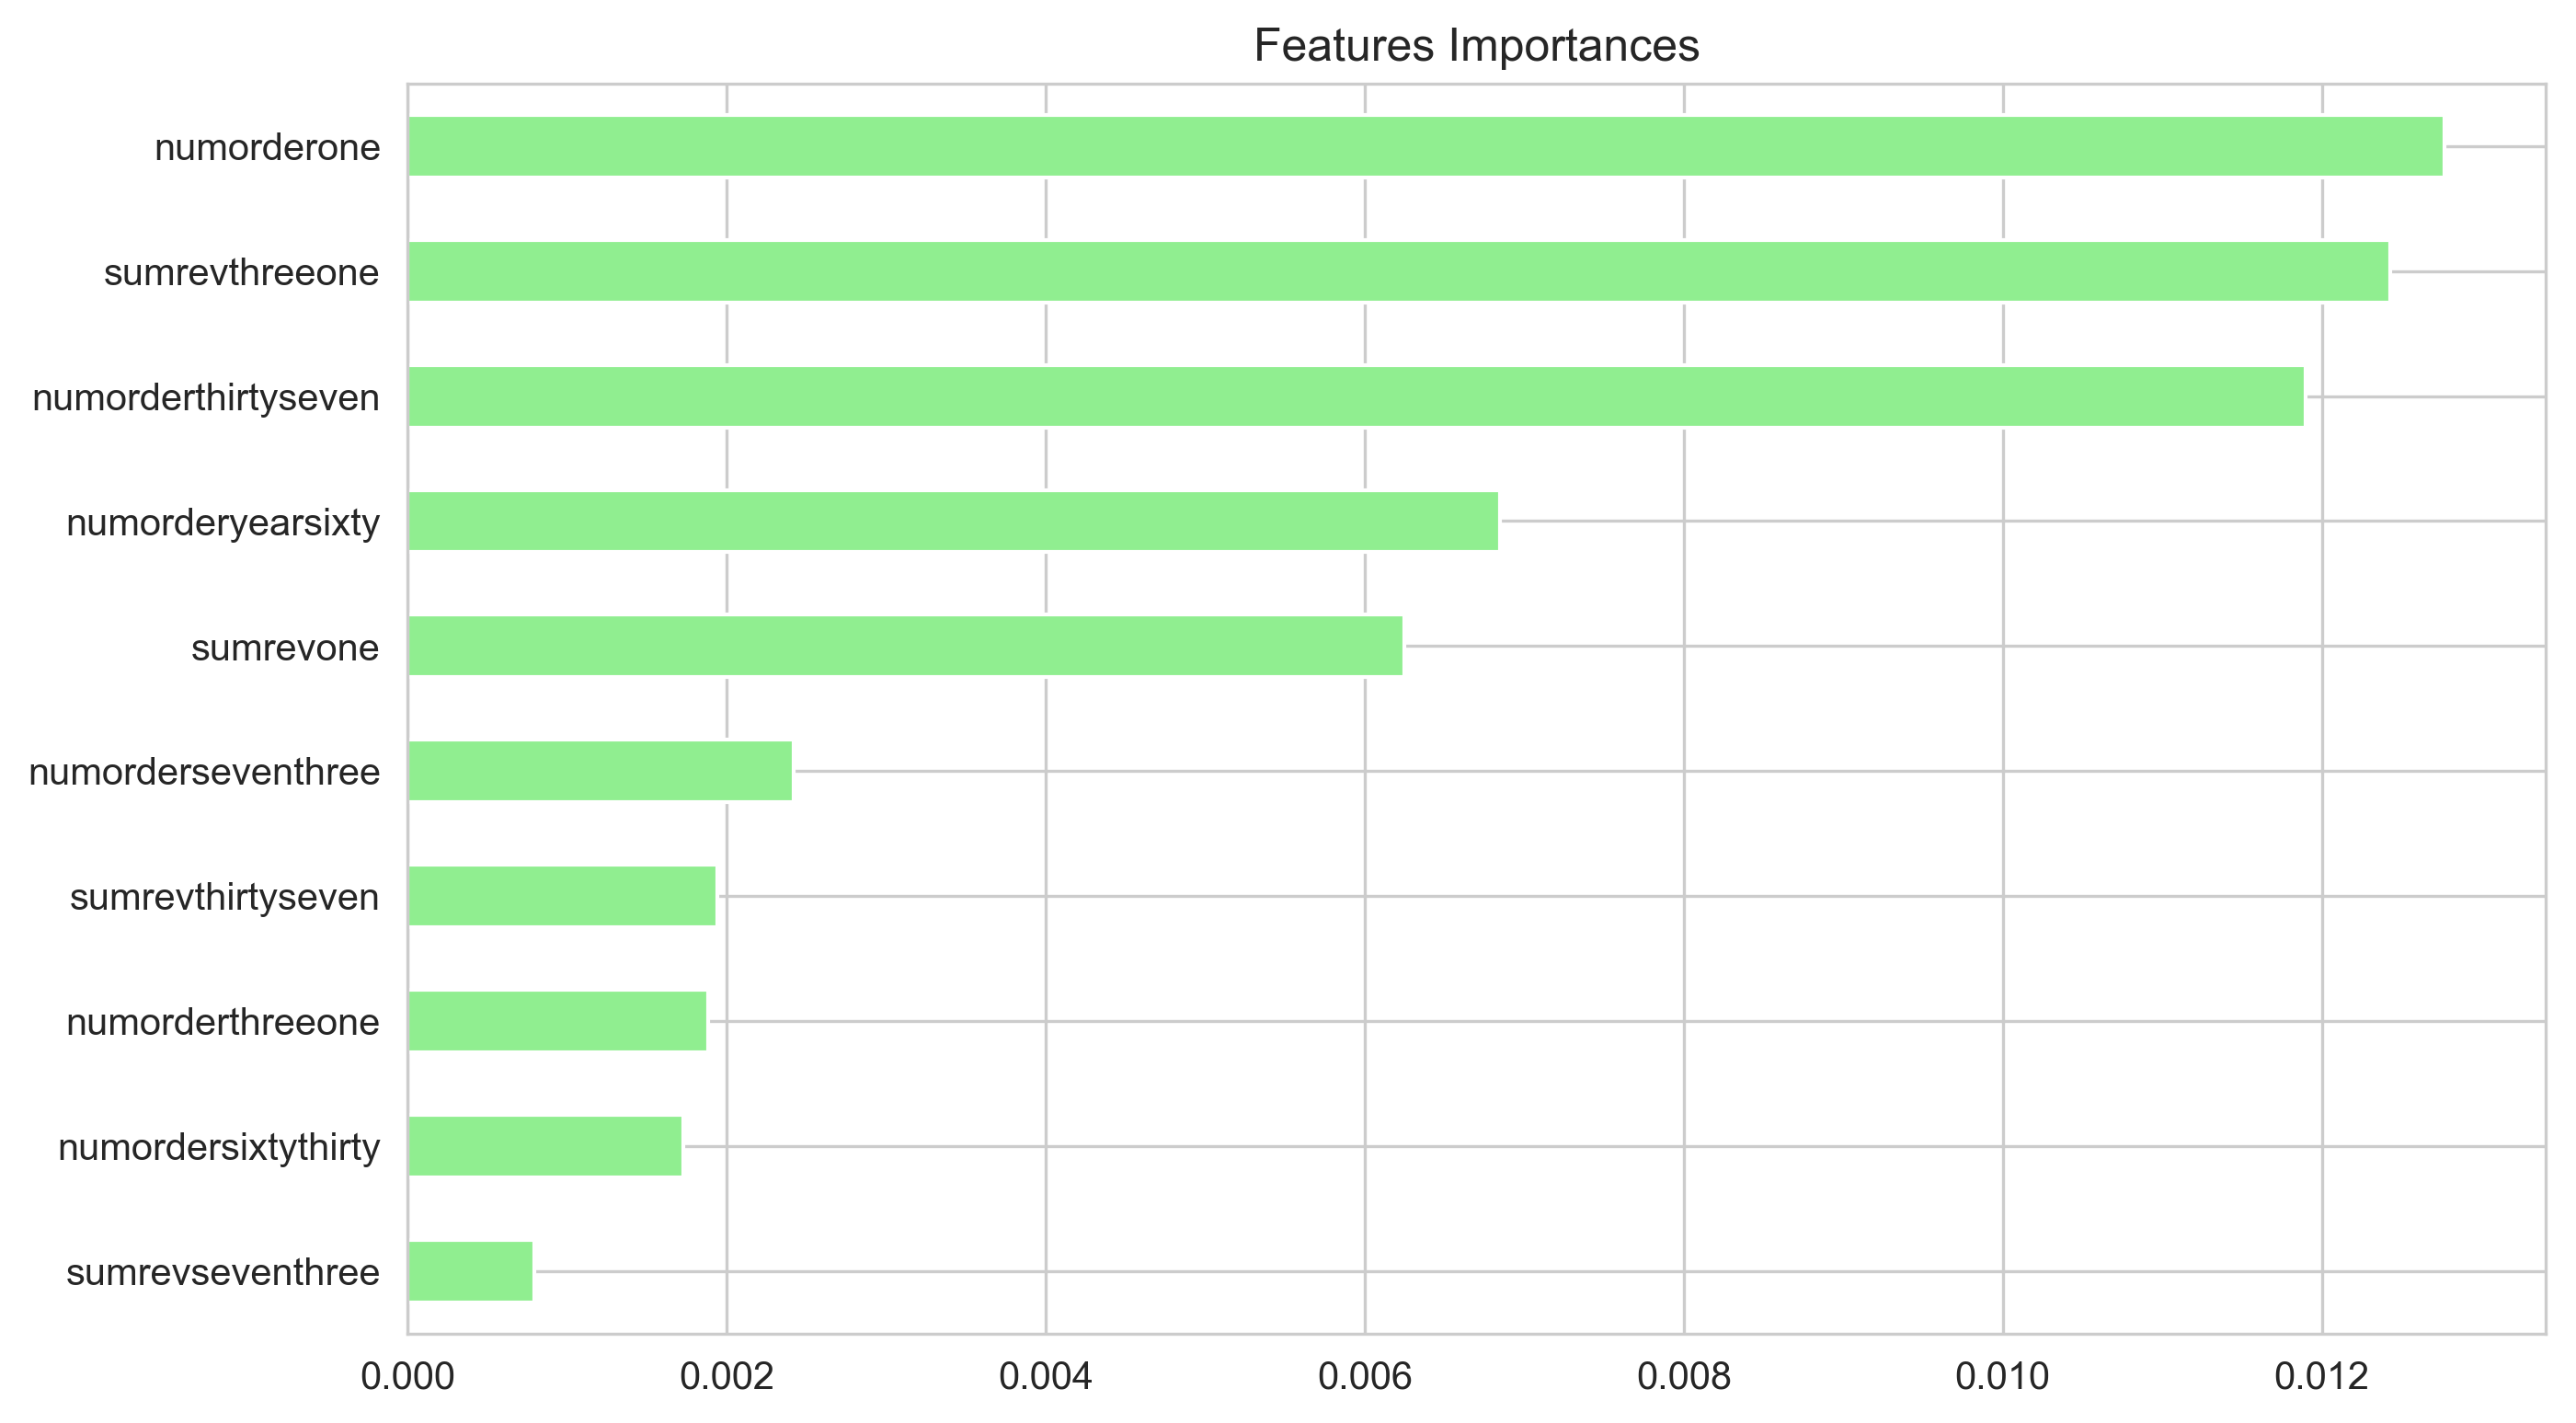

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
importances = pd.Series(data=rf.feature_importances_[:10],
                        index= list(data.columns)[2:][:10])

# Sort importances
importances_sorted = importances.sort_values()
plt.figure(figsize=(10,6),dpi=300)
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [44]:
mask = rf.feature_importances_ > 0.003
features.numpy()[:,mask].shape

(28126, 101)

In [45]:

features = features.numpy()[:,mask]
Xtrain, Xtest, ytrain, ytest = train_test_split(features, targets_1)
sm = SMOTE(random_state=224)
X,y = sm.fit_sample(Xtrain, ytrain)
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
print(lr.score(Xtrain,ytrain))
print(lr.score(Xtest,ytest))



/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8972693656964066
0.8964732650739476


In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain,ytrain)
print(nb.score(Xtrain,ytrain))
print(nb.score(Xtest,ytest))

0.8579690907367024
0.8650455062571104


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
X_s = scaler.transform(Xtrain)
X_t = scaler.transform(Xtest)

In [48]:
svm = SVC()
svm.fit(X_s,ytrain)
print(svm.score(X_s,ytrain))
print(svm.score(X_t,ytest))

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9234853512847255
0.8977531285551763


In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [3, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(rf, param_grid,cv=5)
grid_search.fit(X_s, ytrain)

# Print the optimal parameters
print(grid_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}


In [52]:
rf = RandomForestClassifier(max_features='sqrt',bootstrap=False,criterion='gini',max_depth=None,)
rf.fit(X_s,ytrain)
print(rf.score(X_s,ytrain))
print(rf.score(X_t,ytest))

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.999905186308903
0.898037542662116


In [12]:
c_space = np.logspace(-5, 8, 15)
log_grid = {'C': c_space,'penalty': ['l1', 'l2']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, log_grid, cv = 5)

logreg_cv.fit(X_s,ytrain)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
#
#Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l1'}
#Tuned Logistic Regression Accuracy: 1.0

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed 

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear fai

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 1.0


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#SVM
degree = [1,2]
gamma = [.001, .01,]
kernel = ["rbf","poly"]
parameters_svm = {'C':c_space, 'degree': degree, 'gamma':gamma,'kernel':kernel }

svm_cv = GridSearchCV(svm,parameters_svm,cv = 5)
svm_cv.fit(X_s,ytrain)
print("Tuned SVM Parameter: {}".format(svm_cv.best_params))
print("Tuned SVM Accuracy: {}".format(svm_cv.best_score_))

KeyboardInterrupt: 

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k = [1, 3, 5, 11, 21, 41, 61, 81]
parameters_knn = {'n_neighbors':k}
knn_cv = GridSearchCV(knn,parameters_knn,cv = 5)
knn_cv.fit(X_s,ytrain)
print("Tuned KNN Parameter: {}".format(knn_cv.best_params_))
print("Tuned KNN Accuracy: {}".format(knn_cv.best_score_))

In [ ]:
from sklearn.linear_model import Perceptron
per = Perceptron(tol=1e-3, random_state=42)
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
parameters_per = {'alpha':alpha}
per_cv = GridSearchCV(per,parameters_per,cv = 5)
per_cv.fit(X_s,ytrain)
print("Tuned Perceptron Parameter: {}".format(per_cv.best_params_))
print("Tuned Perceptron Accuracy: {}".format(per_cv.best_score_))


In [113]:
lr = LogisticRegression(C= 0.0007196856730011522, penalty= 'l1')# logistics
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=41)
nb = GaussianNB()
rf = RandomForestClassifier(max_features='sqrt',bootstrap=False,criterion='gini',max_depth=None,)
per = Perceptron(alpha = 1e-06)


In [116]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('RandomForest', rf),
               ('SVM',svm),('Perceptron',per)]


for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_s, ytrain)    
  
    # Predict y_pred
    y_pred = clf.predict(X_t)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression : 0.897
K Nearest Neighbours : 0.897


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest : 0.895


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM : 0.898
Perceptron : 0.844


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [184]:
holdout = pd.read_csv('df_holdout_scholarjet.csv',index_col=0)
holdout.head()
holdout = holdout.replace('NaN',np.NaN)
holdout.fillna(holdout.mean(), inplace=True)
print(holdout.isnull().sum())

cuid                            0
roll_up                         0
currentstatus                   0
companytypegroup                0
team                            0
customersource                  0
accrole                         0
num_employees                   0
num_purchases_year              0
cost_purchases_year             0
enrollmentmethod                0
numorderone                     0
numorderthreeone                0
numorderseventhree              0
numorderthirtyseven             0
numordersixtythirty             0
numorderyearsixty               0
sumrevone                       0
sumrevthreeone                  0
sumrevseventhree                0
sumrevthirtyseven               0
sumrevsixtythirty               0
sumrevyearsixty                 0
numbamorder                     0
numselforder                    0
totalrev                        0
aov                             0
dayssincelastord                0
cuidshare                       0
numstores     

In [185]:
dummy_fields = ['roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']

for each in dummy_fields:
    dummies = pd.get_dummies(holdout[each], prefix=each, drop_first=False)

    holdout = pd.concat([holdout, dummies], axis=1)
holdout.shape    

(30375, 236)

In [186]:
fields_to_drop = ['cuid', 'roll_up', 'currentstatus', 'companytypegroup','team','customersource','accrole','num_employees',
                'num_purchases_year','cost_purchases_year','enrollmentmethod']
testdata = holdout.drop(fields_to_drop, axis=1)



In [84]:
X = testdata.iloc[:,mask]
X.shape

(30375, 101)

In [85]:
Xpr = scaler.transform(X)


/anaconda3/envs/deep-learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [105]:
def mutilPred(X,clf):
    Answer = []
    for clf_name, clf in classifiers:    

        y_pred = clf.predict(X)
        Answer.append(y_pred)
    Ans = np.array(Answer)
    ans = np.sum(Ans,axis=0)
    fi = [1 for i in ans if i >=3]
    return fi

In [108]:
ans = mutilPred(Xpr,classifiers)

In [117]:
pr1 = rf.predict(Xpr)
pr2 = lr.predict(Xpr)
pr3 = knn.predict(Xpr)
pr4 = svm.predict(Xpr)
pr5 = per.predict(Xpr)

In [131]:
fia = pr1+pr6+pr3+pr4+pr5

In [145]:
anss = [1 if i >=2 else 0 for i in fia]

In [129]:
nb.fit(X_s,ytrain)
pr6 = nb.predict(Xpr)

In [146]:
Counter(anss)

Counter({0: 28189, 1: 2186})

In [159]:
submission = pd.read_csv('df_holdout_scholarjet.csv',index_col=0)
answer = submission[['cuid']]


In [160]:
answer['pred_convert_30'] = anss

/anaconda3/envs/deep-learning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
answer.head()
answer.to_csv('final_answer_need.csv')

### Regression

In [187]:
testdata['pred_convert_30'] = anss


In [223]:
testdata.to_csv('answer1.csv')

In [188]:
dummy_hold_regression = testdata[dummy_hold['pred_convert_30'] == 1]
dummy_hold_regression.describe().to_csv('regression.csv')
dummy_hold_regression.head()

,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,sumrevseventhree,sumrevthirtyseven,...,cost_purchases_year_5to25,cost_purchases_year_None,cost_purchases_year_lessthan1,enrollmentmethod_directEIN,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone,pred_convert_30
2,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,0,0,1,0,0,0,0,0,1
3,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,0,0,1,1
6,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,215.96000,...,0,1,0,1,0,0,0,0,0,1
16,0.000000,0.00000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1155.31000,...,0,1,0,0,0,0,1,0,0,1
17,0.011308,0.02992,0.04115,0.258049,0.311764,1.792995,6.449748,13.171598,18.491596,125.88206,...,0,1,0,0,0,0,1,0,0,1


In [193]:
drop_list = ['pred_convert_30','numtasksotherone','numtasksotherthreeone','numtasksotherseventhree','numtasksotherthirtyseven',
             'numtasksothersixtythirty','numtasksotheryearsixty','decmakerflagone','decmakerflagsevenone',
             'decmakerflagfourteenseven','decmakerflagthirtyfourteen','currentstatus_Inactive','customersource_Display - Acquisition',
            'customersource_Display - Retargeting','customersource_Self ID']
data1= dummy_hold_regression.drop(drop_list,axis =1)

